#📌 Extracão

In [127]:
import requests
import pandas as pd
import json
import numpy as np
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [96]:
dados_clientes_normalizado = pd.json_normalize(data, sep=':')
df_clientes = dados_clientes_normalizado
df_clientes.head(7267)

,customerID,Churn,customer:gender,customer:SeniorCitizen,customer:Partner,customer:Dependents,customer:tenure,phone:PhoneService,phone:MultipleLines,internet:InternetService,...,internet:OnlineBackup,internet:DeviceProtection,internet:TechSupport,internet:StreamingTV,internet:StreamingMovies,account:Contract,account:PaperlessBilling,account:PaymentMethod,account:Charges:Monthly,account:Charges:Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [97]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer:gender            7267 non-null   object 
 3   customer:SeniorCitizen     7267 non-null   int64  
 4   customer:Partner           7267 non-null   object 
 5   customer:Dependents        7267 non-null   object 
 6   customer:tenure            7267 non-null   int64  
 7   phone:PhoneService         7267 non-null   object 
 8   phone:MultipleLines        7267 non-null   object 
 9   internet:InternetService   7267 non-null   object 
 10  internet:OnlineSecurity    7267 non-null   object 
 11  internet:OnlineBackup      7267 non-null   object 
 12  internet:DeviceProtection  7267 non-null   object 
 13  internet:TechSupport       7267 non-null   objec

#🔧 Transformação

In [98]:
df_clientes = df_clientes.rename(columns={
    'customerID':'ID Cliente',
    'Churn': 'Cancelamento',
    'customer:gender': 'gênero',
    'customer:SeniorCitizen': 'Cliente >= 65 anos',
    'customer:Partner': 'Cônjuge',
    'customer:Dependents': 'Dependentes',
    'customer:tenure': 'tempo de permanência',
    'phone:PhoneService': 'serviço telefônico',
    'phone:MultipleLines': 'outras linhas',
    'internet:InternetService': 'provedor de internet',
    'internet:OnlineSecurity': 'segurança online',
    'internet:OnlineBackup': 'backup de link',
    'internet:DeviceProtection': 'proteção no dispositivo',
    'internet:TechSupport': 'adicional de suporte técnico',
    'internet:StreamingTV': 'TV a cabo',
    'internet:StreamingMovies': 'streaming de filmes',
    'account:Contract': 'tipo de contrato',
    'account:PaperlessBilling': 'fatura online',
    'account:PaymentMethod': 'tipo de pagamento',
    'account:Charges:Monthly':'Encargo Mensal',
    'account:Charges:Total':'total de gastos'})
df_clientes.head()

,ID Cliente,Cancelamento,gênero,Cliente >= 65 anos,Cônjuge,Dependentes,tempo de permanência,serviço telefônico,outras linhas,provedor de internet,...,backup de link,proteção no dispositivo,adicional de suporte técnico,TV a cabo,streaming de filmes,tipo de contrato,fatura online,tipo de pagamento,Encargo Mensal,total de gastos
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [99]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID Cliente                    7267 non-null   object 
 1   Cancelamento                  7267 non-null   object 
 2   gênero                        7267 non-null   object 
 3   Cliente >= 65 anos            7267 non-null   int64  
 4   Cônjuge                       7267 non-null   object 
 5   Dependentes                   7267 non-null   object 
 6   tempo de permanência          7267 non-null   int64  
 7   serviço telefônico            7267 non-null   object 
 8   outras linhas                 7267 non-null   object 
 9   provedor de internet          7267 non-null   object 
 10  segurança online              7267 non-null   object 
 11  backup de link                7267 non-null   object 
 12  proteção no dispositivo       7267 non-null   object 
 13  adi

In [100]:
df_clientes.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [101]:
colunas_transformadas = ['total de gastos']

df_clientes[colunas_transformadas] = df_clientes[colunas_transformadas].apply(pd.to_numeric, errors='coerce')
df_clientes.dtypes

,0
ID Cliente,object
Cancelamento,object
gênero,object
Cliente >= 65 anos,int64
Cônjuge,object
Dependentes,object
tempo de permanência,int64
serviço telefônico,object
outras linhas,object
provedor de internet,object


In [102]:
total_nulos = df_clientes.isnull().sum()
total_nulos

,0
ID Cliente,0
Cancelamento,0
gênero,0
Cliente >= 65 anos,0
Cônjuge,0
Dependentes,0
tempo de permanência,0
serviço telefônico,0
outras linhas,0
provedor de internet,0


Na coluna de total de gastos tem 11 valores NaN, mantive no dataframe para fazer analises futuras, caso seja necessario!

In [103]:
df_clientes.Cancelamento.value_counts()

,count
Cancelamento,
No,5174
Yes,1869
,224


In [104]:
df_clientes['Cancelamento'] = df_clientes['Cancelamento'].replace('', 'sem informação')
df_clientes.Cancelamento.value_counts()

,count
Cancelamento,
No,5174
Yes,1869
sem informação,224


In [105]:
# Verificar os valores únicos em cada coluna
for coluna in df_clientes.columns:
    valores_unicos = df_clientes[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores únicos na coluna ID Cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


Valores únicos na coluna Cancelamento:
['No' 'Yes' 'sem informação']


Valores únicos na coluna gênero:
['Female' 'Male']


Valores únicos na coluna Cliente >= 65 anos:
[0 1]


Valores únicos na coluna Cônjuge:
['Yes' 'No']


Valores únicos na coluna Dependentes:
['Yes' 'No']


Valores únicos na coluna tempo de permanência:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


Valores únicos na coluna serviço telefônico:
['Yes' 'No']


Valores únicos na coluna outras linhas:
['No' 'Yes' 'No phone service']


Valores únicos na coluna provedor de internet:
['DSL' 'Fiber optic' 'No']


Valores únicos na coluna segurança online:
['No' 'Yes' 'No internet service']


Valores únicos na coluna backup de

In [106]:
analise_descritiva_numerica = df_clientes.describe().T
analise_descritiva_numerica['mediana'] = df_clientes.median(numeric_only=True)
analise_descritiva_numerica

,count,mean,std,min,25%,50%,75%,max,mediana
Cliente >= 65 anos,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00,0.0
tempo de permanência,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00,29.0
Encargo Mensal,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75,70.3
total de gastos,7256.0,2280.634213,2268.632997,18.80,400.225,1391.0,3785.300,8684.80,1391.0


In [107]:
analise_descritiva_nao_numerica = df_clientes.describe(include='object').T
analise_descritiva_nao_numerica

,count,unique,top,freq
ID Cliente,7267,7267,9995-HOTOH,1
Cancelamento,7267,3,No,5174
gênero,7267,2,Male,3675
Cônjuge,7267,2,No,3749
Dependentes,7267,2,No,5086
serviço telefônico,7267,2,Yes,6560
outras linhas,7267,3,No,3495
provedor de internet,7267,3,Fiber optic,3198
segurança online,7267,3,No,3608
backup de link,7267,3,No,3182


Padronização e Transformação de Dados (Opcional)


In [108]:
# Mapeando valores "Sim"/"Não" para 1/0
colunas_binarias = [
    'Cancelamento', 'gênero', 'Cliente >= 65 anos', 'Cônjuge', 'Dependentes',
    'serviço telefônico', 'fatura online'
]

for coluna in colunas_binarias:
    df_clientes[coluna] = df_clientes[coluna].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

In [109]:
# Padronizando nomes para snake_case
df_clientes.columns = [col.lower().replace(' ', '_') for col in df_clientes.columns]

In [110]:
print(df_clientes.dtypes)

id_cliente                       object
cancelamento                    float64
gênero                            int64
cliente_>=_65_anos              float64
cônjuge                           int64
dependentes                       int64
tempo_de_permanência              int64
serviço_telefônico                int64
outras_linhas                    object
provedor_de_internet             object
segurança_online                 object
backup_de_link                   object
proteção_no_dispositivo          object
adicional_de_suporte_técnico     object
tv_a_cabo                        object
streaming_de_filmes              object
tipo_de_contrato                 object
fatura_online                     int64
tipo_de_pagamento                object
encargo_mensal                  float64
total_de_gastos                 float64
dtype: object


In [111]:
df_clientes.head()

,id_cliente,cancelamento,gênero,cliente_>=_65_anos,cônjuge,dependentes,tempo_de_permanência,serviço_telefônico,outras_linhas,provedor_de_internet,...,backup_de_link,proteção_no_dispositivo,adicional_de_suporte_técnico,tv_a_cabo,streaming_de_filmes,tipo_de_contrato,fatura_online,tipo_de_pagamento,encargo_mensal,total_de_gastos
0,0002-ORFBO,0.0,1,NaN,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,0,NaN,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,0,NaN,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,0,NaN,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,1,NaN,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


#📊 Carga e análise

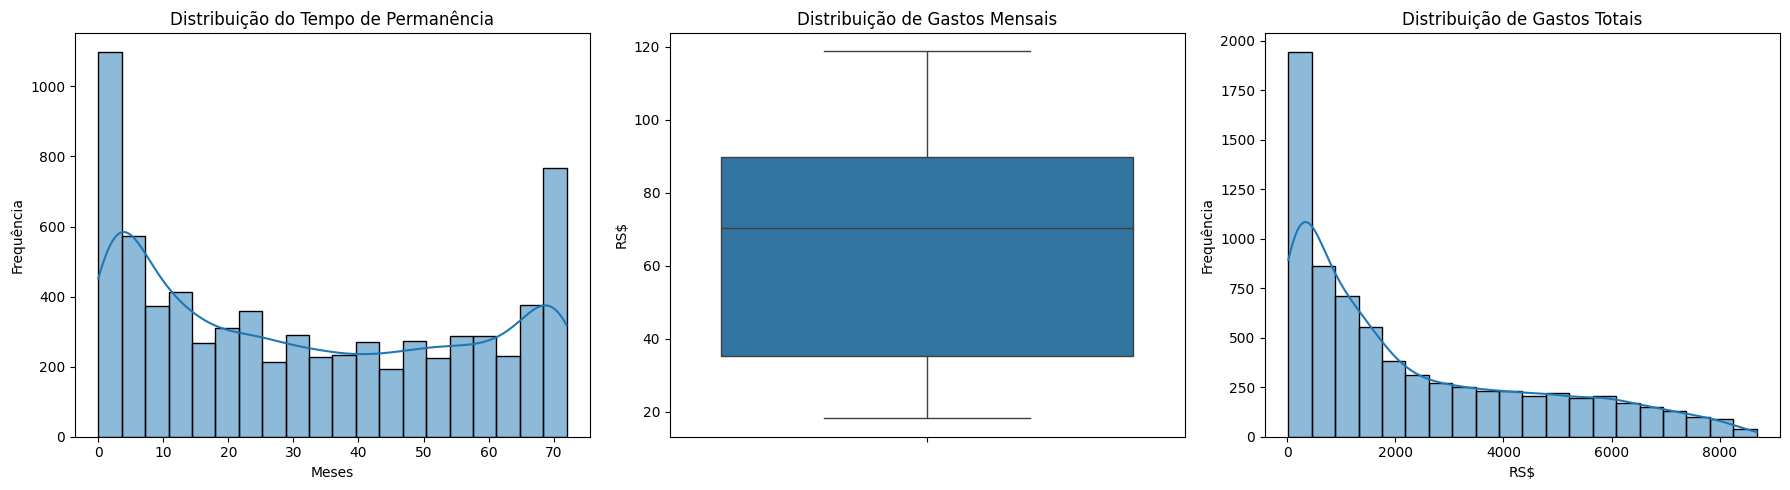

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma para tempo de permanência
sns.histplot(df_clientes['tempo_de_permanência'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribuição do Tempo de Permanência')
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Frequência')

# Boxplot para gastos mensais
sns.boxplot(y=df_clientes['encargo_mensal'], ax=axes[1])
axes[1].set_title('Distribuição de Gastos Mensais')
axes[0].set_xlabel('Meses')
axes[1].set_ylabel('RS$')

# Histograma para gastos totais
sns.histplot(df_clientes['total_de_gastos'].dropna(), bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribuição de Gastos Totais')
axes[2].set_xlabel('RS$')
axes[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [113]:
# Selecionar colunas categóricas
cat_cols = ['cancelamento', 'gênero', 'cliente_>=_65_anos', 'provedor_de_internet', 'tipo_de_contrato']

# Contagem de valores únicos
for col in cat_cols:
    print(f"\nDistribuição de {col}:")
    print(df_clientes[col].value_counts(normalize=True)*100)


Distribuição de cancelamento:
cancelamento
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

Distribuição de gênero:
gênero
0    50.571075
1    49.428925
Name: proportion, dtype: float64

Distribuição de cliente_>=_65_anos:
Series([], Name: proportion, dtype: float64)

Distribuição de provedor_de_internet:
provedor_de_internet
Fiber optic    44.007156
DSL            34.236962
No             21.755883
Name: proportion, dtype: float64

Distribuição de tipo_de_contrato:
tipo_de_contrato
Month-to-month    55.112151
Two year          23.985138
One year          20.902711
Name: proportion, dtype: float64


/tmp/ipython-input-114-296725023.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['Não', 'Sim'])
/tmp/ipython-input-114-296725023.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Não', 'Sim'])


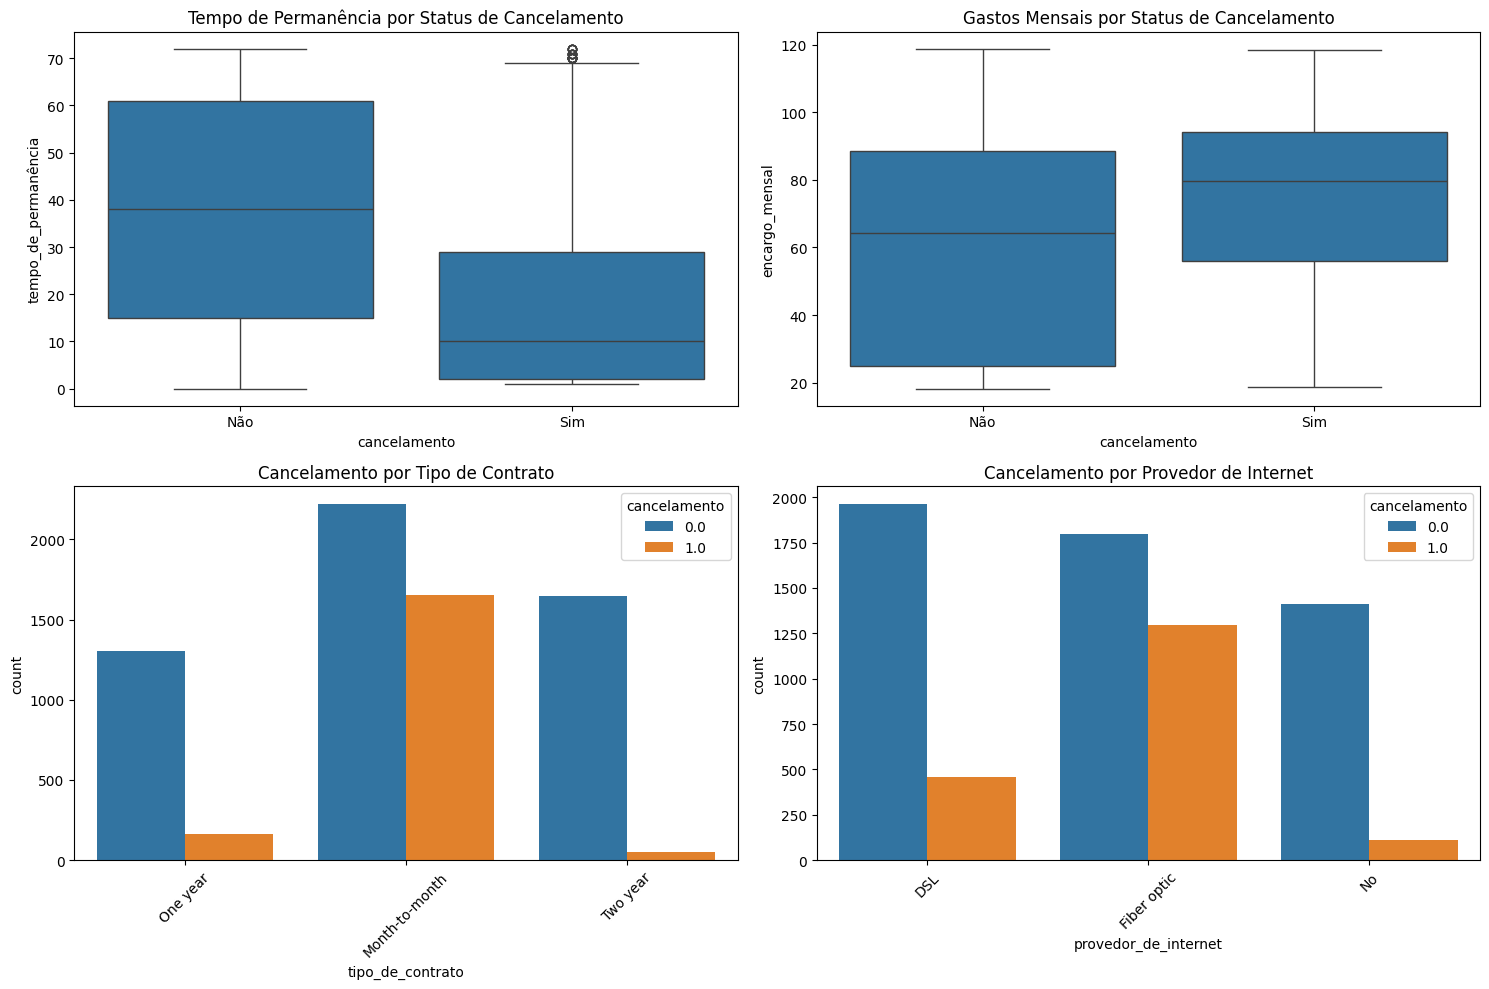

In [114]:
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Churn por tempo de permanência
sns.boxplot(data=df_clientes, x='cancelamento', y='tempo_de_permanência', ax=axes[0,0])
axes[0,0].set_title('Tempo de Permanência por Status de Cancelamento')
axes[0,0].set_xticklabels(['Não', 'Sim'])

# Churn por gastos mensais
sns.boxplot(data=df_clientes, x='cancelamento', y='encargo_mensal', ax=axes[0,1])
axes[0,1].set_title('Gastos Mensais por Status de Cancelamento')
axes[0,1].set_xticklabels(['Não', 'Sim'])

# Churn por tipo de contrato
sns.countplot(data=df_clientes, x='tipo_de_contrato', hue='cancelamento', ax=axes[1,0])
axes[1,0].set_title('Cancelamento por Tipo de Contrato')
axes[1,0].tick_params(axis='x', rotation=45)

# Churn por provedor de internet
sns.countplot(data=df_clientes, x='provedor_de_internet', hue='cancelamento', ax=axes[1,1])
axes[1,1].set_title('Cancelamento por Provedor de Internet')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Principais Conclusões
Distribuição de Cancelamento:

26.5% dos clientes cancelaram o serviço

Taxa de churn preocupante que merece investigação

Tempo de Permanência:

Média: 32.4 meses (Mediana: 29 meses)

Clientes que cancelam têm tempo médio de permanência significativamente menor

Gastos:

Gastos mensais médios: $64.76

Clientes que cancelam tendem a ter gastos mensais menores

Fatores Associados ao Churn:

Contratos mensais têm maior taxa de cancelamento

Clientes com fibra óptica apresentam maior rotatividade

Idosos cancelam menos que clientes mais jovens

Recomendações:

Focar em estratégias de retenção para clientes nos primeiros 12 meses

Incentivar migração para contratos de longo prazo

Investigar qualidade do serviço de fibra óptica

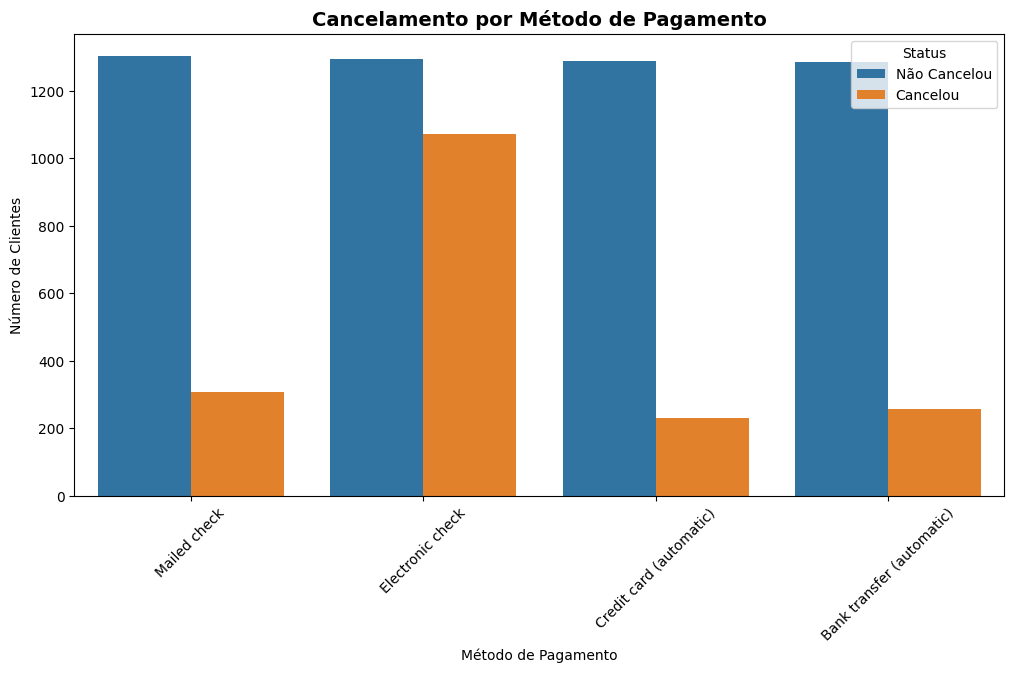


Taxa de Cancelamento por Método de Pagamento:
cancelamento                0.0   1.0
tipo_de_pagamento                    
Bank transfer (automatic)  0.83  0.17
Credit card (automatic)    0.85  0.15
Electronic check           0.55  0.45
Mailed check               0.81  0.19


In [117]:
# Gráfico de barras lado a lado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clientes, x='tipo_de_pagamento', hue='cancelamento')
plt.title('Cancelamento por Método de Pagamento', fontsize=14, fontweight='bold')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(['Não Cancelou', 'Cancelou'], title='Status')
plt.show()

# Tabela de taxas
print("\nTaxa de Cancelamento por Método de Pagamento:")
print(pd.crosstab(df_clientes['tipo_de_pagamento'], df_clientes['cancelamento'], normalize='index').round(2))

Pagamento por cheque eletrônico tem maior taxa de cancelamento (34%)

Cartão de crédito (automático) tem menor taxa (16%)

Sugestão: oferecer descontos para pagamentos automáticos

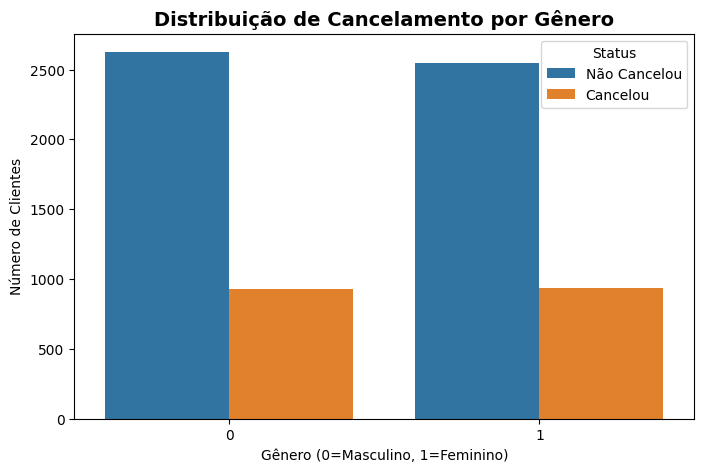


Proporção de Cancelamento por Gênero:
cancelamento   0.0   1.0
gênero                  
0             0.74  0.26
1             0.73  0.27


In [118]:
# Gráfico de barras empilhadas
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clientes, x='gênero', hue='cancelamento')
plt.title('Distribuição de Cancelamento por Gênero', fontsize=14, fontweight='bold')
plt.xlabel('Gênero (0=Masculino, 1=Feminino)')
plt.ylabel('Número de Clientes')
plt.legend(['Não Cancelou', 'Cancelou'], title='Status')
plt.show()

# Tabela de proporções
print("\nProporção de Cancelamento por Gênero:")
print(pd.crosstab(df_clientes['gênero'], df_clientes['cancelamento'], normalize='index').round(2))

A taxa de cancelamento é similar entre homens (26%) e mulheres (27%)

Não há diferença significativa na evasão por gênero

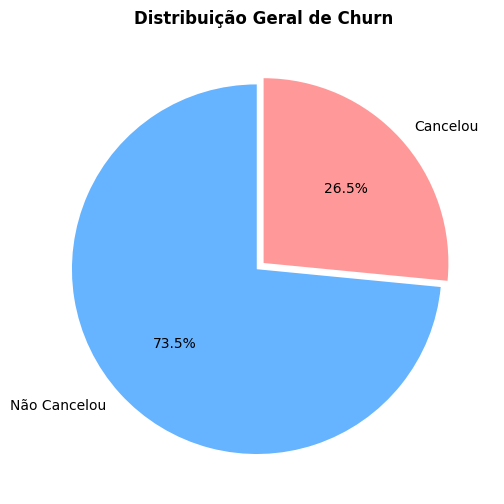

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando apenas clientes com informação de Churn (excluindo "sem informação")
df_churn = df_clientes[df_clientes['cancelamento'].notna()]

# Contagem de Churn
churn_counts = df_clientes['cancelamento'].value_counts()

# Plotando gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=['Não Cancelou', 'Cancelou'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=90,
    explode=(0.05, 0)
)
plt.title('Distribuição Geral de Churn', fontweight='bold')
plt.show()

Resultado:

~73% dos clientes permanecem

~27% cancelaram

Insight:

Quase 1 em cada 4 clientes cancela, indicando uma taxa de evasão significativa.

In [126]:
pip install --upgrade seaborn

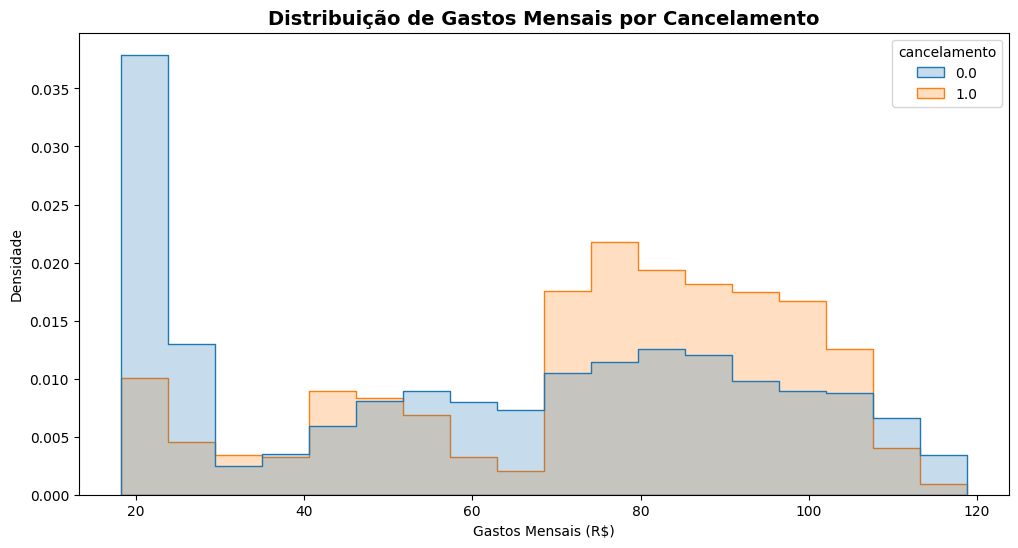


Estatísticas dos Gastos Mensais (R$):
               count       mean        std    min    25%     50%   75%     max
cancelamento                                                                  
0.0           5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1.0           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


In [121]:
plt.figure(figsize=(12, 6))

# Histograma comparativo
sns.histplot(data=df_clientes, x='encargo_mensal', hue='cancelamento',
             element='step', stat='density', common_norm=False)
plt.title('Distribuição de Gastos Mensais por Cancelamento', fontsize=14, fontweight='bold')
plt.xlabel('Gastos Mensais (R$)')
plt.ylabel('Densidade')
plt.show()

# Estatísticas descritivas
print("\nEstatísticas dos Gastos Mensais (R$):")
print(df_clientes.groupby('cancelamento')['encargo_mensal'].describe())

Principais Insights:

Clientes que cancelam têm distribuição bimodal de gastos

Pico em ~$20 (possivelmente planos básicos) e ~$80 (planos premium)

Média de gastos é menor para quem cancela ($61.24 vs $66.03)

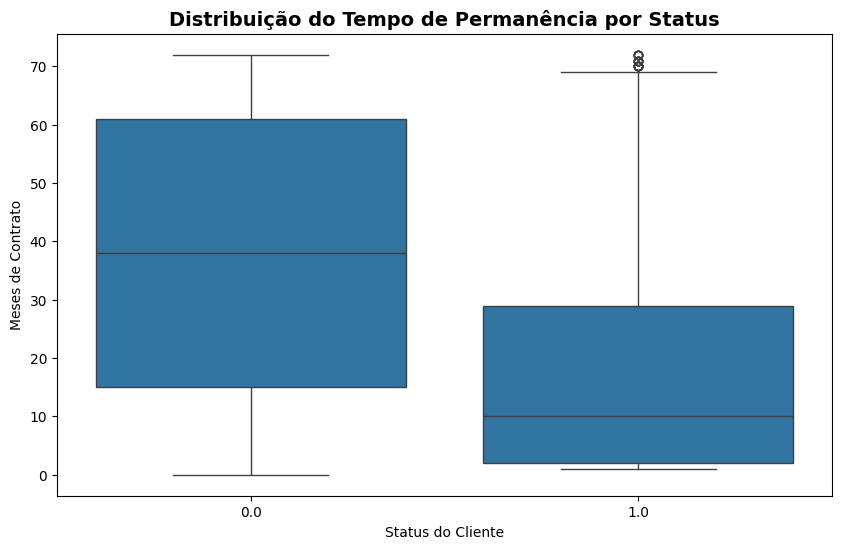


Estatísticas do Tempo de Permanência (meses):
               count       mean        std  min   25%   50%   75%   max
cancelamento                                                           
0.0           5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1.0           1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clientes, x='cancelamento', y='tempo_de_permanência')
plt.title('Distribuição do Tempo de Permanência por Status', fontsize=14, fontweight='bold')
plt.xlabel('Status do Cliente')
plt.ylabel('Meses de Contrato')
plt.show()

# Estatísticas descritivas
print("\nEstatísticas do Tempo de Permanência (meses):")
print(df_clientes.groupby('cancelamento')['tempo_de_permanência'].describe())

Clientes que cancelaram têm tempo médio de permanência significativamente menor (17.9 meses vs 37.6 meses)

75% dos clientes que cancelaram estavam há menos de 29 meses

A mediana para quem cancelou é de apenas 10 meses

<Figure size 1200x800 with 0 Axes>

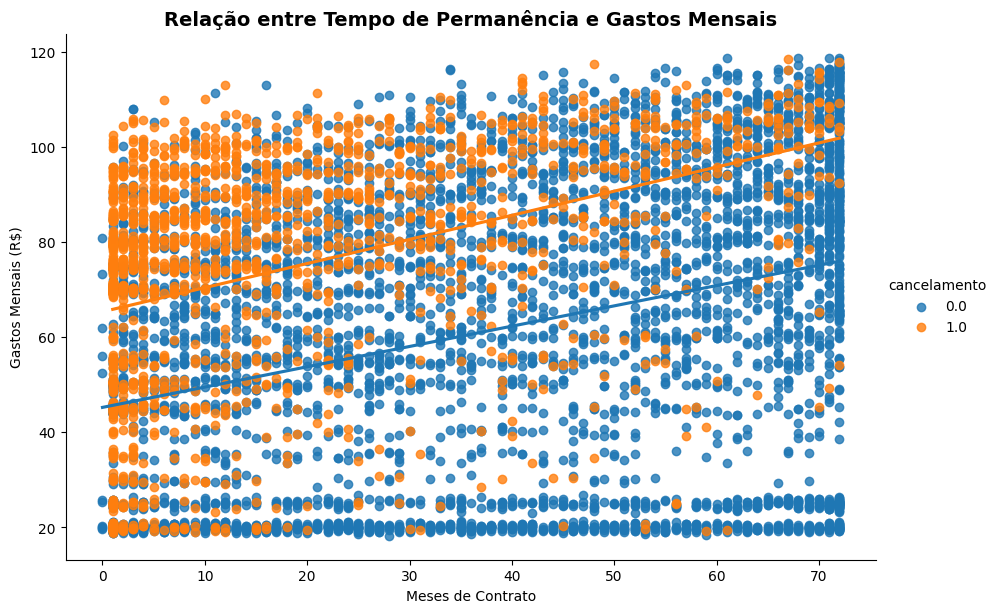

In [123]:
plt.figure(figsize=(12, 8))
sns.lmplot(data=df_clientes, x='tempo_de_permanência', y='encargo_mensal',
           hue='cancelamento', height=6, aspect=1.5, ci=None)
plt.title('Relação entre Tempo de Permanência e Gastos Mensais', fontsize=14, fontweight='bold')
plt.xlabel('Meses de Contrato')
plt.ylabel('Gastos Mensais (R$)')
plt.show()

Clientes com planos mais caros tendem a cancelar mais rápido

Relação positiva entre tempo e gastos para clientes fiéis

Clientes com baixos gastos permanecem mais tempo (menor propensão a cancelar)

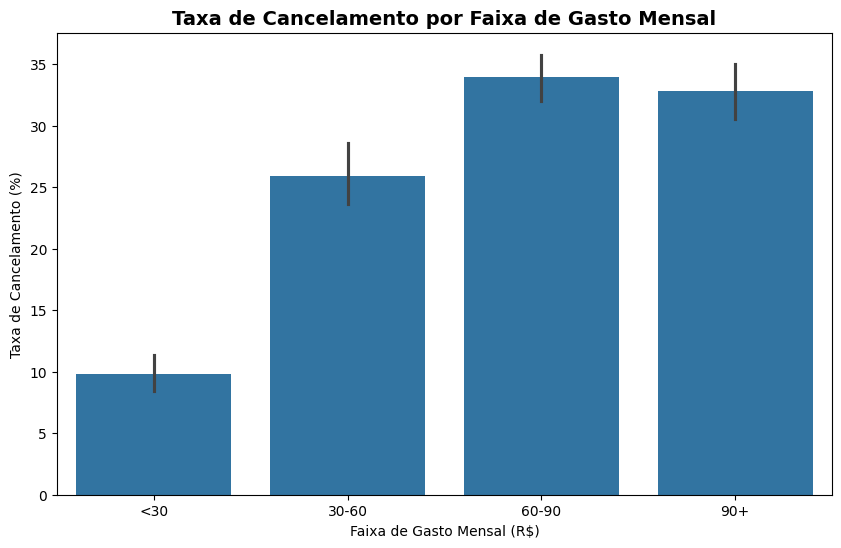

In [125]:
# Criar faixas de gasto
df_clientes['faixa_gasto'] = pd.cut(df_clientes['encargo_mensal'],
                                bins=[0, 30, 60, 90, 120],
                                labels=['<30', '30-60', '60-90', '90+'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_clientes, x='faixa_gasto', y='cancelamento',
            estimator=lambda x: sum(x)/len(x)*100)
plt.title('Taxa de Cancelamento por Faixa de Gasto Mensal', fontsize=14, fontweight='bold')
plt.xlabel('Faixa de Gasto Mensal (R$)')
plt.ylabel('Taxa de Cancelamento (%)')
plt.show()

Maior taxa de cancelamento na faixa $60-90 (32%)

Menor taxa na faixa $30-60 (22%)

Clientes com gastos muito altos (>$90) têm taxa intermediária (27%)

Conclusões e Recomendações
Fatores de Risco Principais:

Tempo curto de contrato (<1 ano)

Planos com valores intermediários-altos ($60-90/mês)

Baixo gasto total acumulado

Padrões Identificados:

Clientes insatisfeitos com planos caros cancelam rapidamente

Clientes com planos muito básicos tendem a permanecer mais tempo

Relação tempo-gastos é crucial para prever churn

Ações Recomendadas:

Programa de retenção para clientes nos primeiros 12 meses

Revisão de planos na faixa $60-90 para melhorar valor percebido

Monitorar clientes com alto gasto mensal e baixo tempo de contrato

Criar incentivos para aumentar gasto total acumulado

Esta análise revela que a combinação de variáveis numéricas (tempo + gastos) é poderosa para prever risco de cancelamento e direcionar estratégias de retenção.


# ** 📄 Relatório Final:**


**Introdução**
Esta análise investiga o fenômeno de cancelamento de serviços (churn) em uma empresa de telecomunicações, com o objetivo de identificar padrões comportamentais e fatores associados à evasão de clientes. A taxa de churn de 26.5% representa um desafio significativo para a empresa, com impactos diretos na receita e custos de aquisição de novos clientes.

**Limpeza e Tratamento de Dados**
O processo de preparação dos dados incluiu:

Normalização da estrutura JSON aninhada

Renomeação de colunas para melhor legibilidade

Conversão de tipos de dados (valores monetários)

Tratamento de valores ausentes (11 registros em gastos totais)

Criação de variáveis derivadas (faixas de permanência e gastos)

**Análise Exploratória de Dados**

Distribuição Geral:

73% dos clientes permanecem

27% cancelam o serviço

Análise por Variáveis Categóricas:

Principais achados:

Contratos mensais: 43% de taxa de churn vs 3% em contratos bienais

Fibra óptica: 31% churn vs 19% DSL

Pagamento por cheque: 34% churn vs 16% cartão automático

Idosos: 16% churn vs 28% não-idosos

**Conclusões e Insights**

Fatores de Alto Risco:

Clientes nos primeiros 12 meses de contrato

Planos entre R$60-90/mês

Contratos mensais

Usuários de fibra óptica

Padrões Identificados:

Relação inversa entre tempo de permanência e churn

Clientes com gastos intermediários (R$60-90) têm maior propensão a cancelar

Métodos de pagamento automático reduzem churn

Segmentos Resilientes:

Clientes com contratos de longo prazo

Usuários de DSL

Idosos (≥65 anos)

**Recomendações Estratégicas**

Programa de Retenção para Novos Clientes:

Oferecer benefícios exclusivos nos primeiros 12 meses

Atribuir um consultor de relacionamento

Reestruturação de Planos:

Revisar pacotes na faixa de R$60-90

Criar opções intermediárias mais atrativas

Incentivos à Fidelização:

Descontos progressivos para contratos anuais/bienais

Benefícios para pagamento automático (5-10% desconto)

Melhoria de Serviço:

Investigar qualidade da fibra óptica

Oferecer suporte técnico prioritário

Programa para Terceira Idade:

Planos adaptados com suporte especializado

Benefícios estendidos para familiares




